In [ ]:
!pip install pycaret
# !pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.7 MB/

#데이터 확인

In [ ]:
# import pandas as pd: pandas 라이브러리를 불러오는 코드이다. pandas는 데이터 분석에 주로 사용되는 파이썬 라이브러리임
import pandas as pd
# numpy는 'Numerical Python'의 줄임말로, 파이썬에서 수치 계산을 위한 핵심 라이브러리입니다. 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공합니다. 'np'는 numpy의 별칭입니다.
import numpy as np

#시각화하는 라이브러리입니다
import matplotlib.pyplot as plt
import seaborn as sns

# pycaret은 머신러닝 실험을 간단하고 효율적으로 할 수 있게 도와주는 오픈소스 라이브러리입니다.
# from pycaret.classification import *

from sklearn.model_selection import KFold,StratifiedKFold

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

In [ ]:
#EDA 데이터
eda = pd.read_csv('/content/train[1].csv')

#훈련 및 예측데이터
df_train = pd.read_csv('/content/train[1].csv')
df_test = pd.read_csv('/content/test[1].csv')

In [ ]:
eda['type'].value_counts()/len(eda)

QSO                    0.248411
GALAXY                 0.186743
SERENDIPITY_BLUE       0.108805
SPECTROPHOTO_STD       0.073153
REDDEN_STD             0.073093
STAR_RED_DWARF         0.068753
STAR_BHB               0.067503
SERENDIPITY_FIRST      0.035662
ROSAT_D                0.032901
STAR_CATY_VAR          0.032531
SERENDIPITY_DISTANT    0.023271
STAR_CARBON            0.016286
SERENDIPITY_RED        0.012811
STAR_WHITE_DWARF       0.010800
STAR_SUB_DWARF         0.005770
STAR_BROWN_DWARF       0.002500
SKY                    0.000635
SERENDIPITY_MANUAL     0.000305
STAR_PN                0.000065
Name: type, dtype: float64

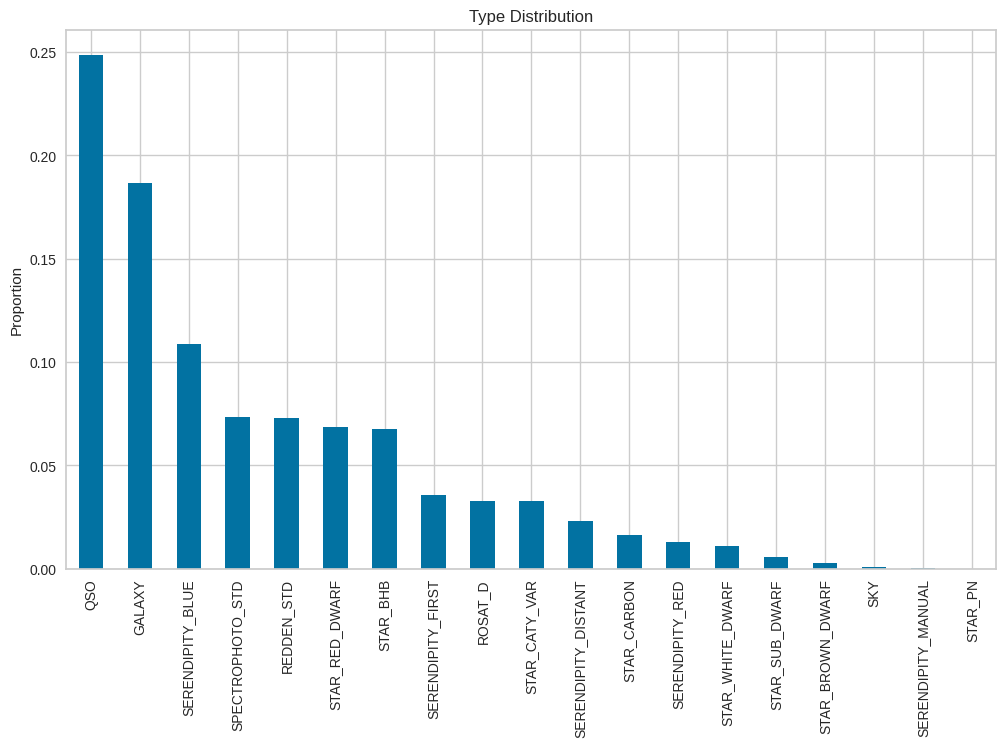

In [ ]:
#비슷한 수의 데이터를 가지는 SPECTROPHOTO_STD와 REDDEN_STD로 정한다.
type_counts = eda['type'].value_counts() / len(eda)
type_counts.plot(kind='bar', figsize=(12, 7))
plt.ylabel('Proportion') #비율이라는 의미
plt.title('Type Distribution') #type의 분포
plt.show()

In [ ]:
#데이터의 모든 열을 생략없이 보여줌
# pd.set_option('display.max_columns', None)

# 전처리 및 EDA

In [ ]:
#위에서부터 5개 행만 보여줌
eda.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [ ]:
# 데이터 type를 변경함으로서 memory 줄임
for col in df_train.columns:
    if df_train[col].dtype=='float64': df_train[col] = df_train[col].astype('float32')
    if df_train[col].dtype=='int64': df_train[col] = df_train[col].astype('int32')

for col in df_test.columns:
    if df_test[col].dtype=='float64': df_test[col] = df_test[col].astype('float32')
    if df_test[col].dtype=='int64': df_test[col] = df_test[col].astype('int32')

In [ ]:
b = ['fiberID','psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z']

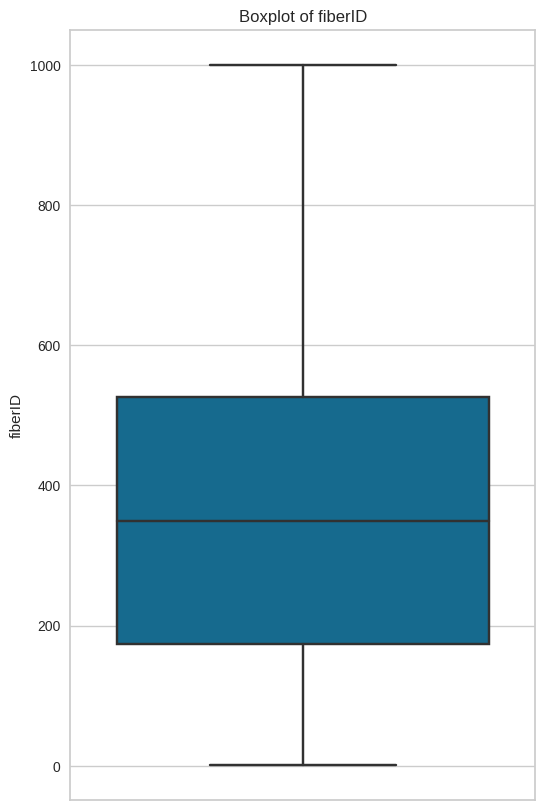

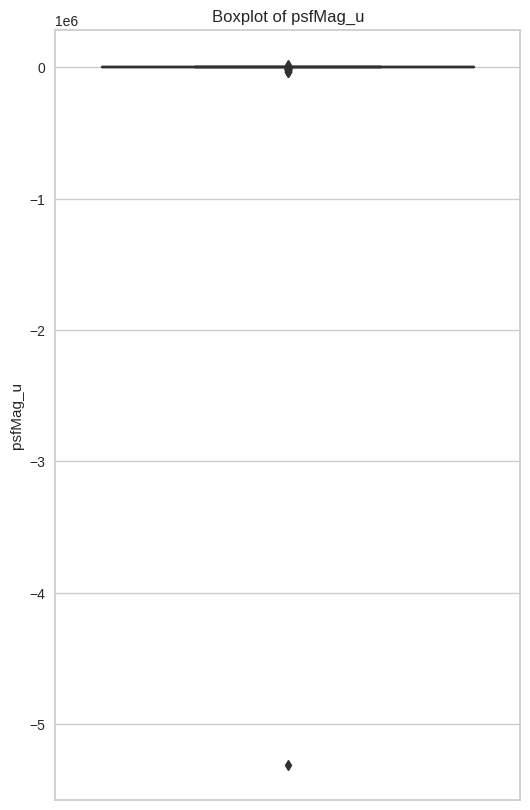

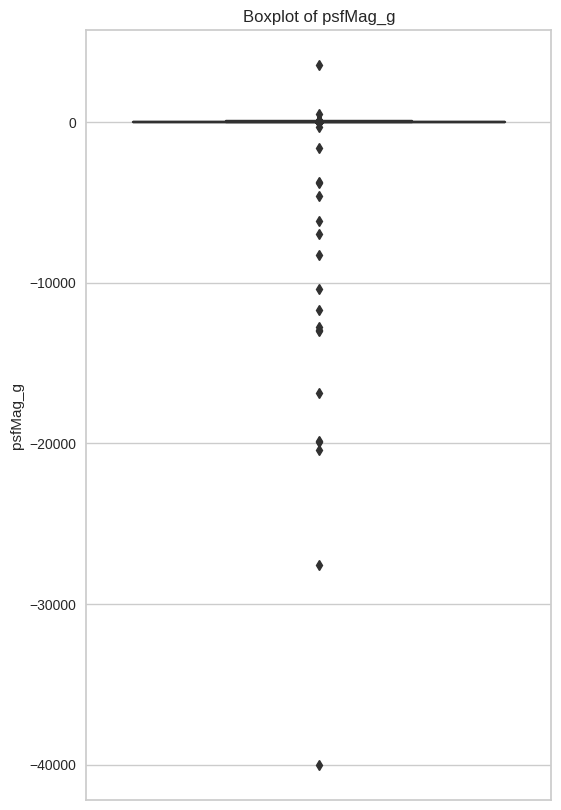

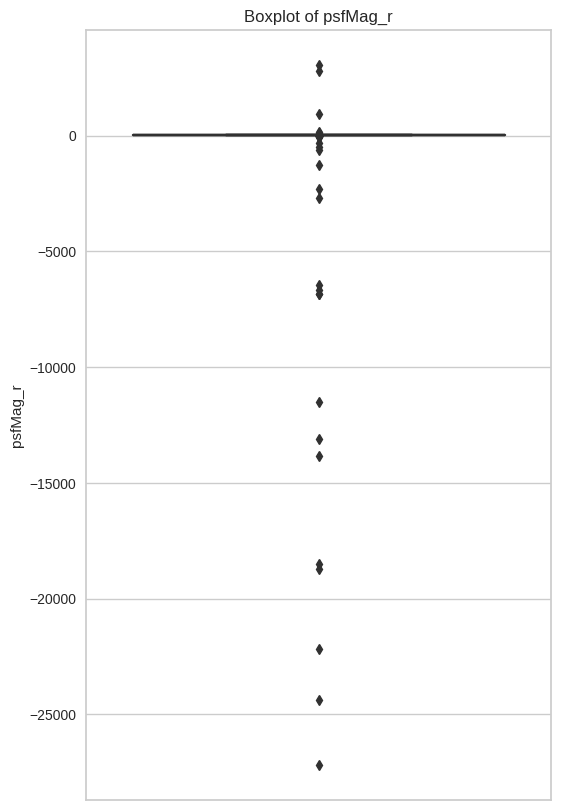

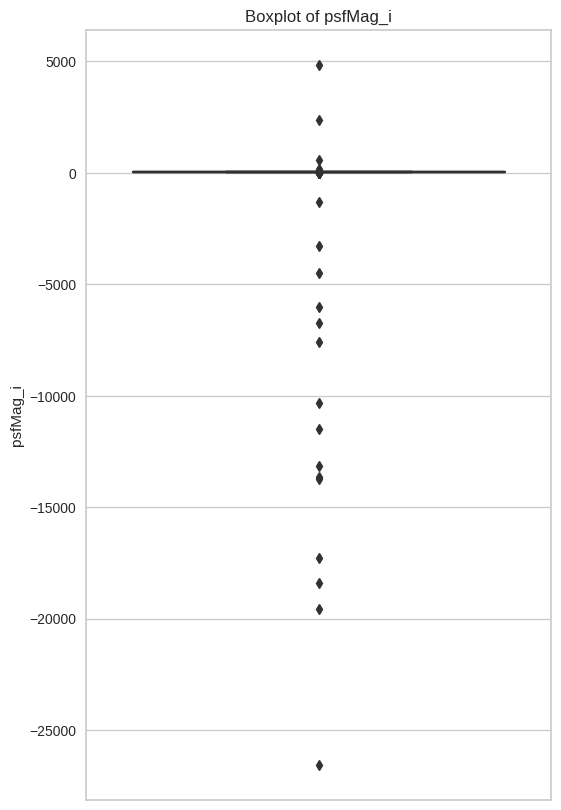

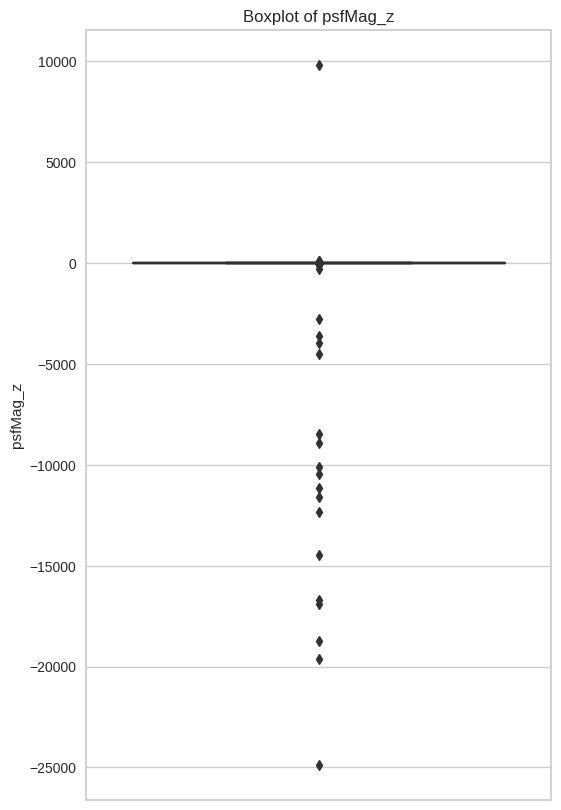

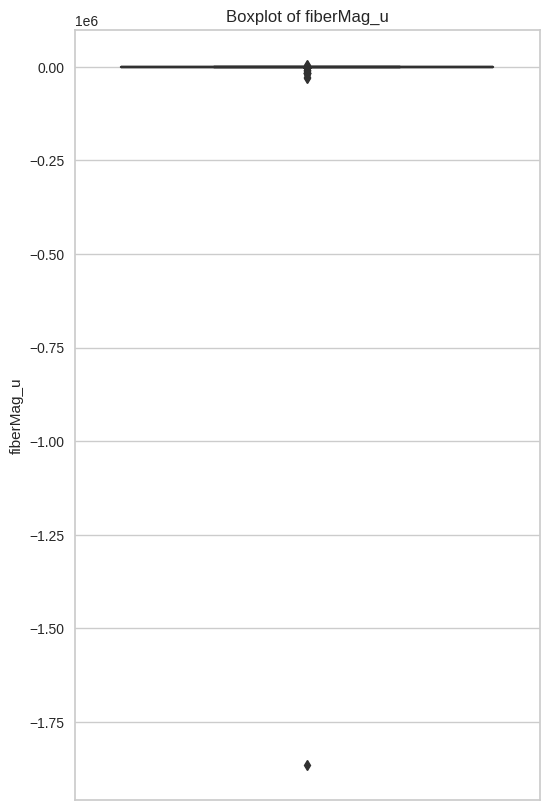

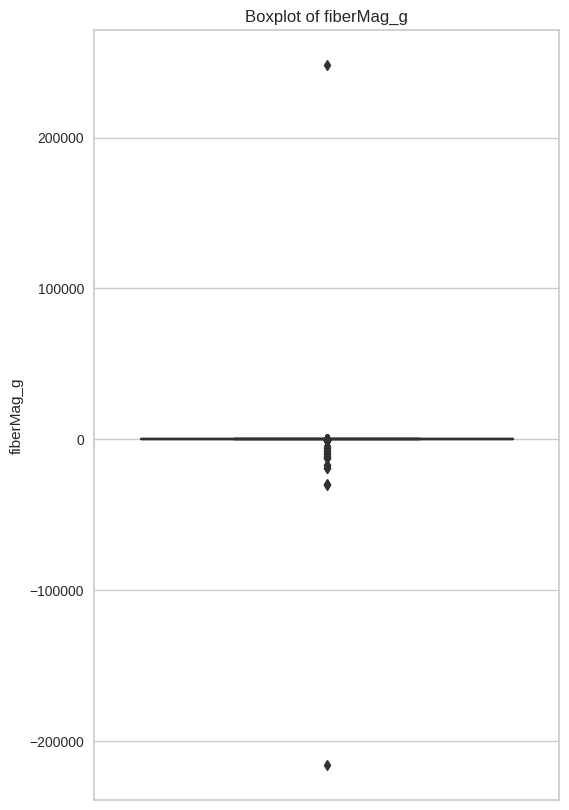

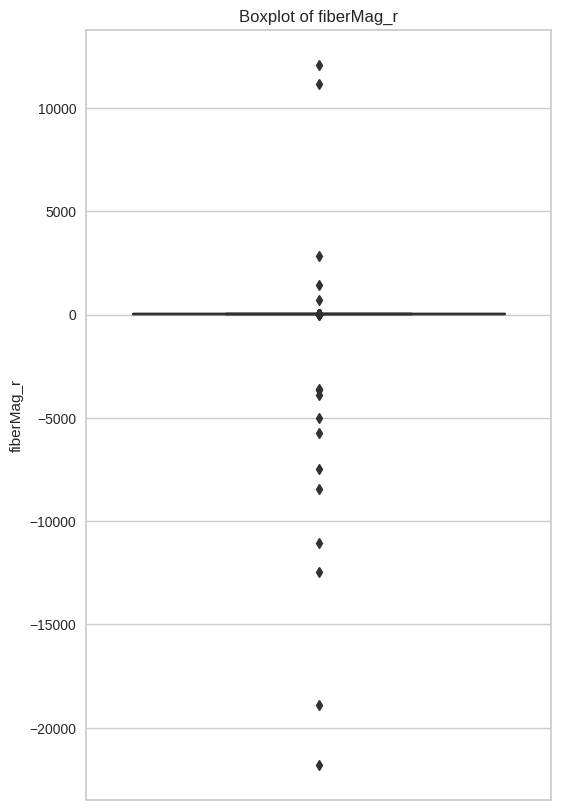

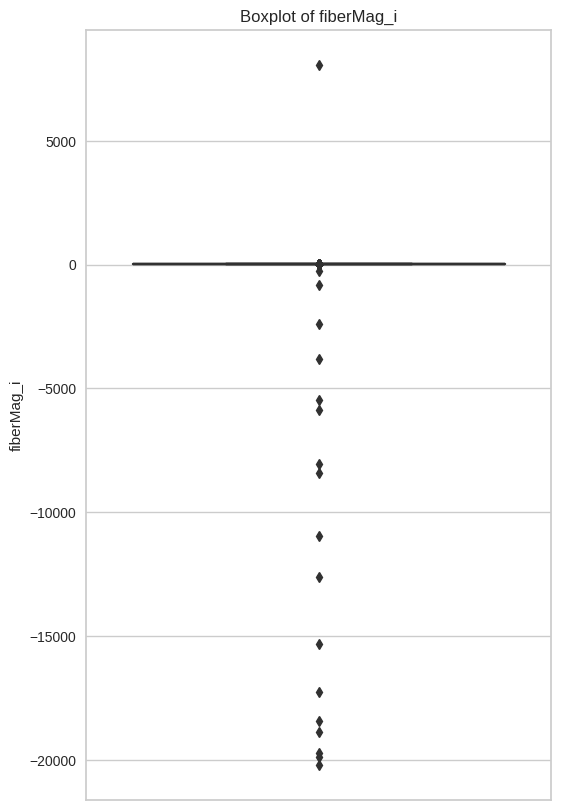

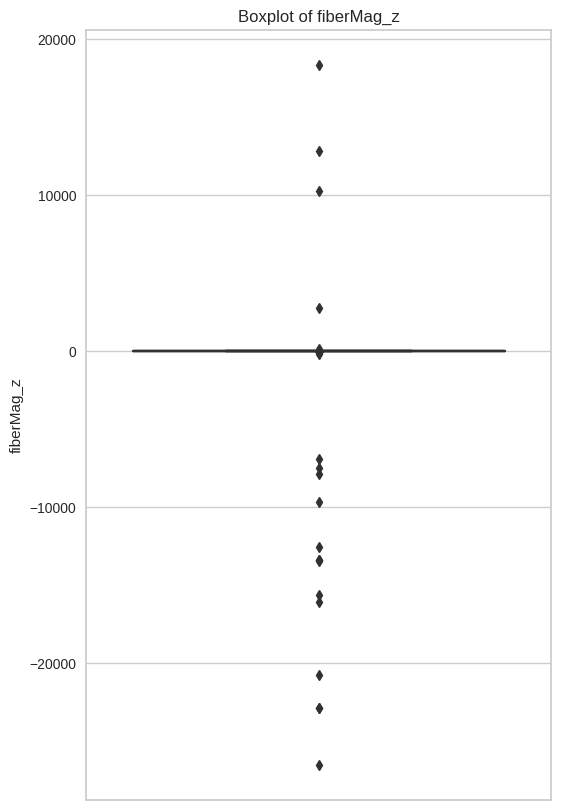

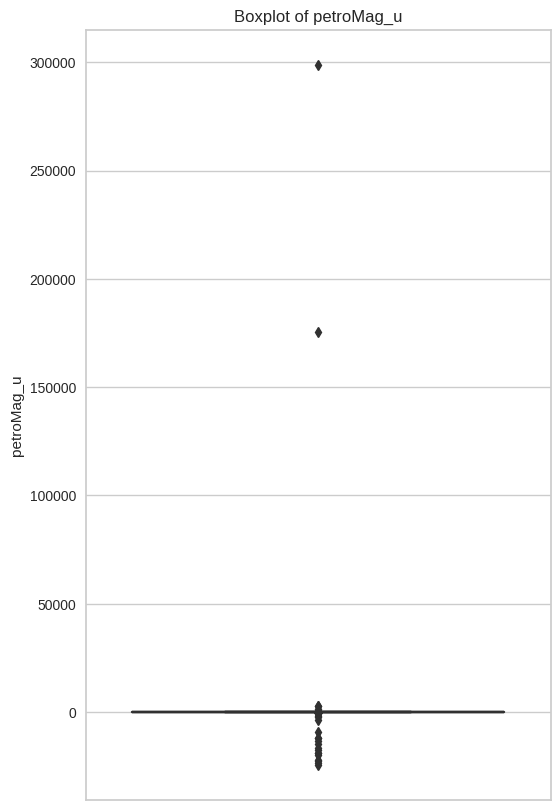

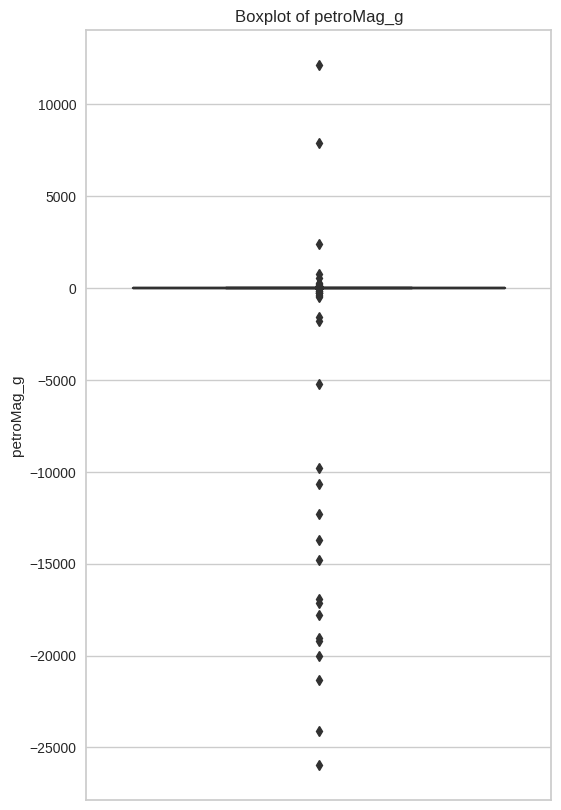

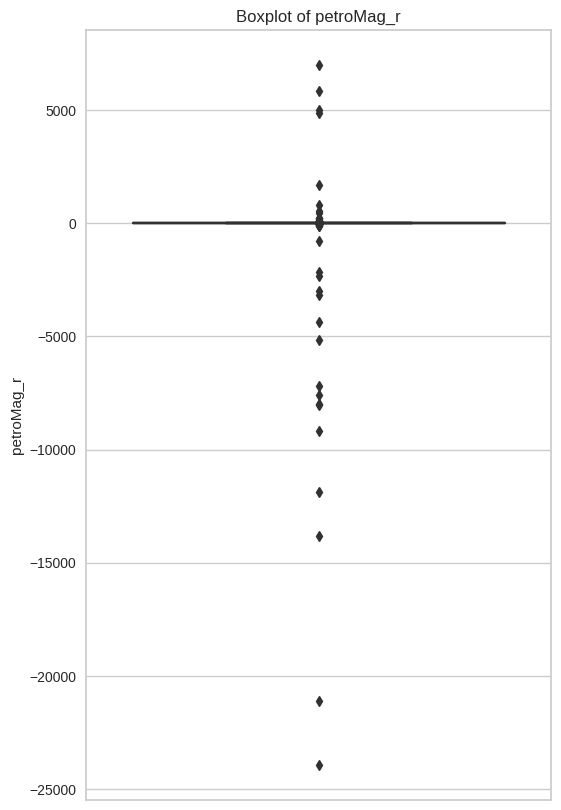

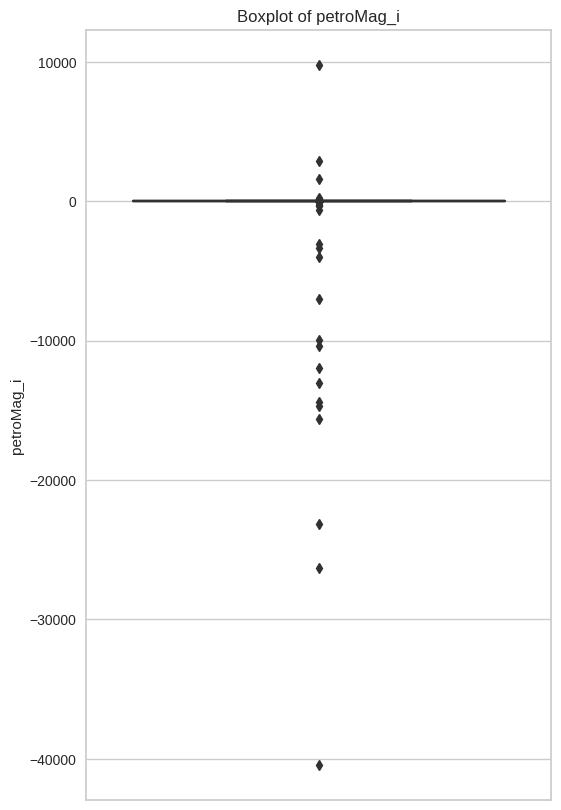

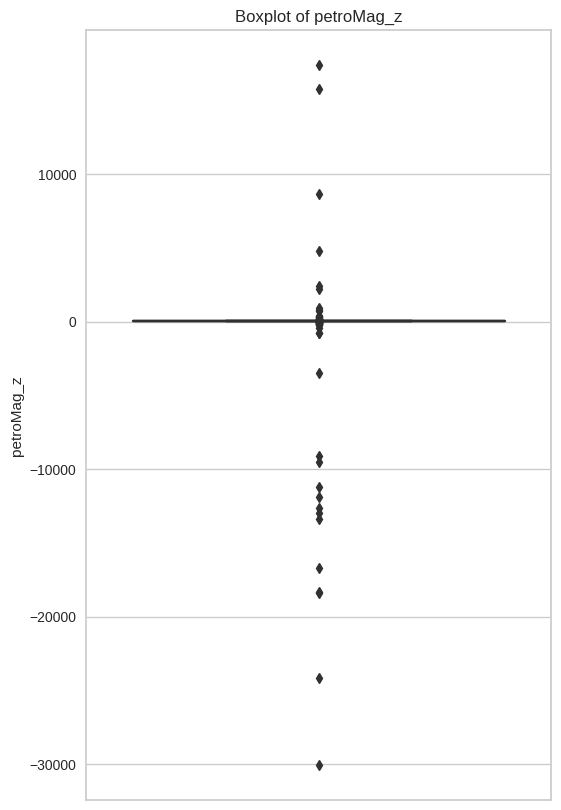

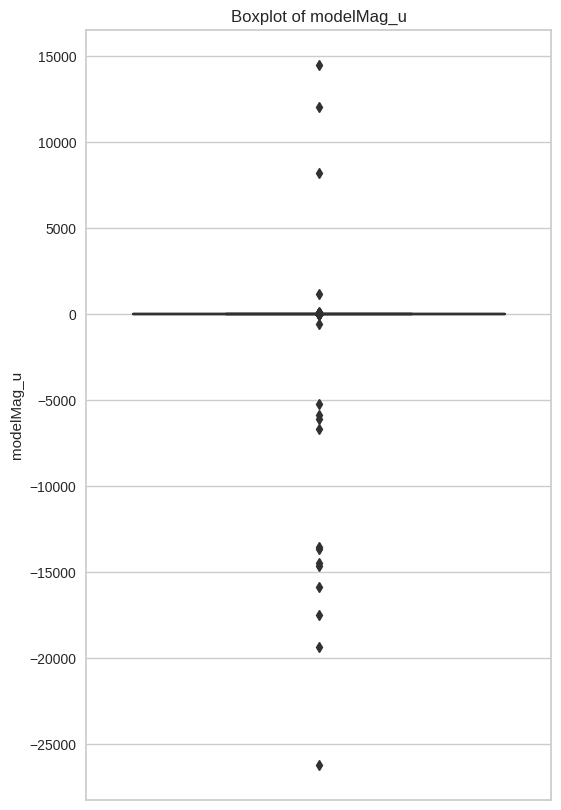

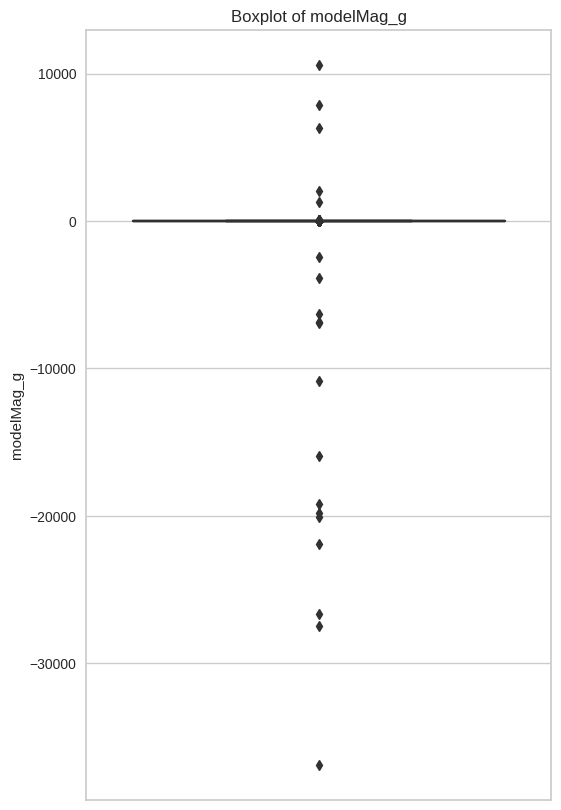

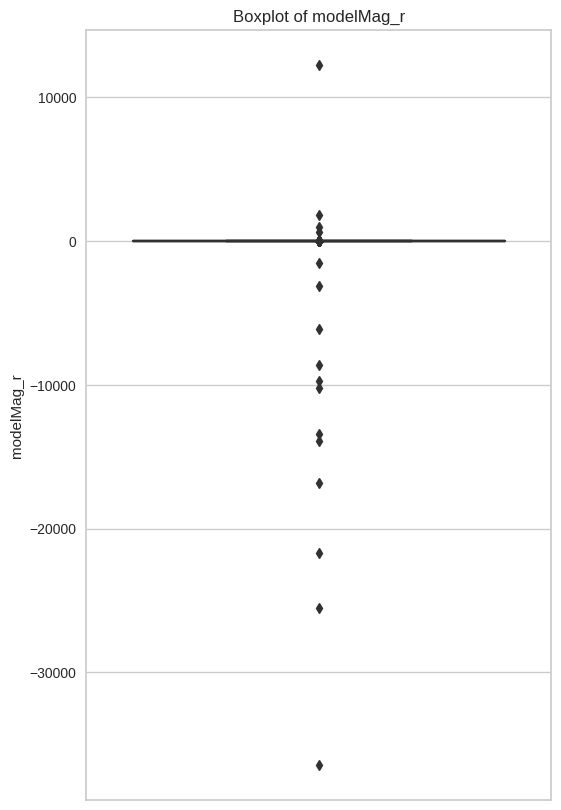

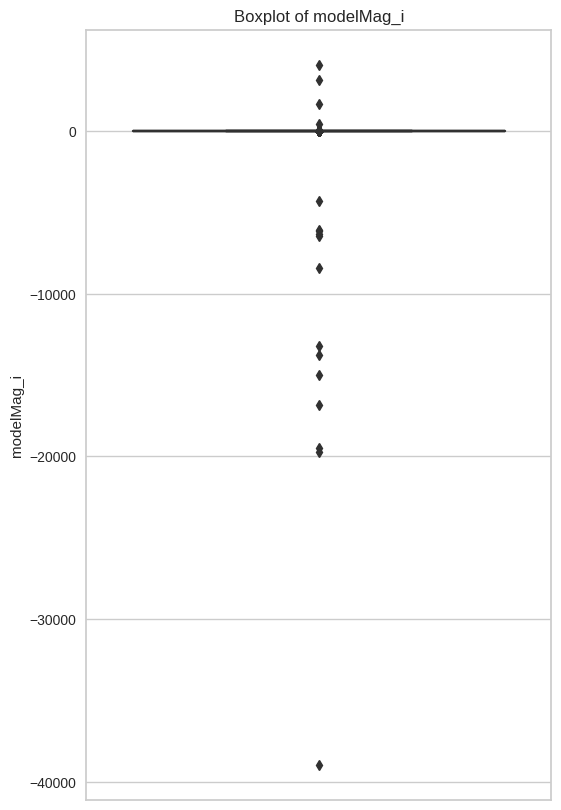

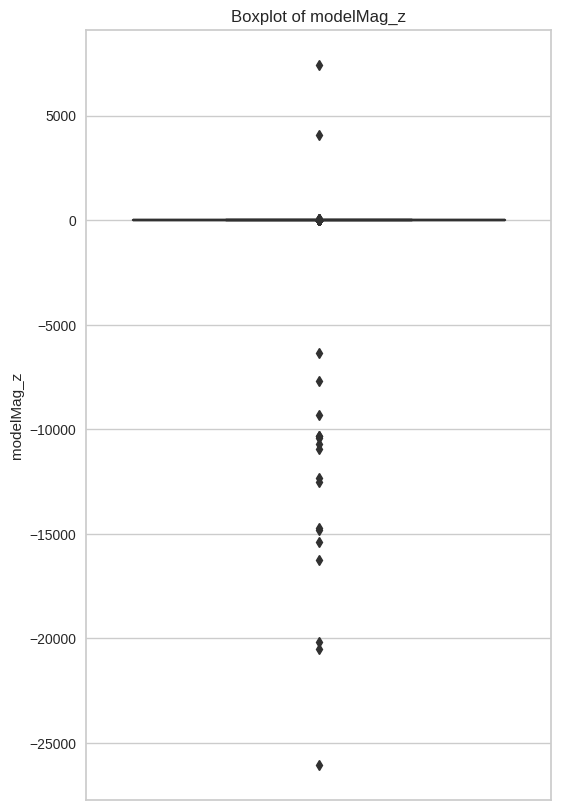

In [ ]:
for column in b:
    plt.figure(figsize=(6, 10))
    sns.boxplot(y=eda[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.001)
    q3 = df_in[col_name].quantile(0.99)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_out.reset_index(drop=True, inplace=True)
    return df_out
for i, name in enumerate(b):
    eda = remove_outlier(eda, name)

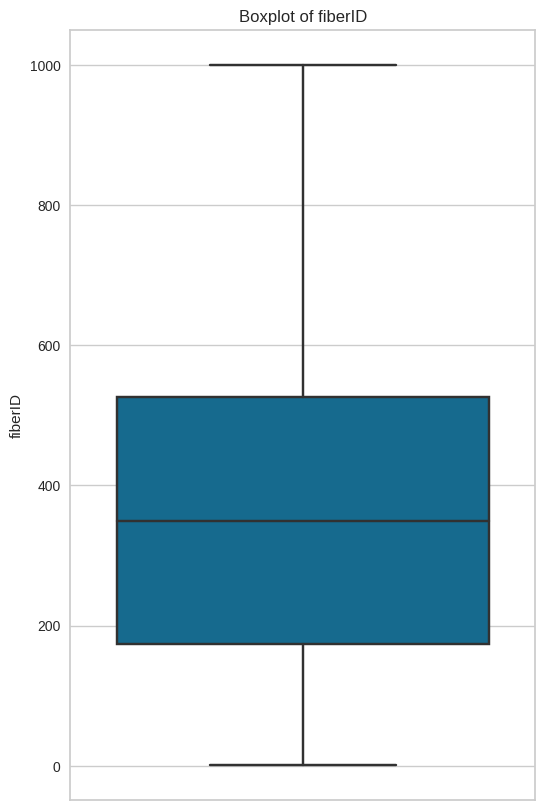

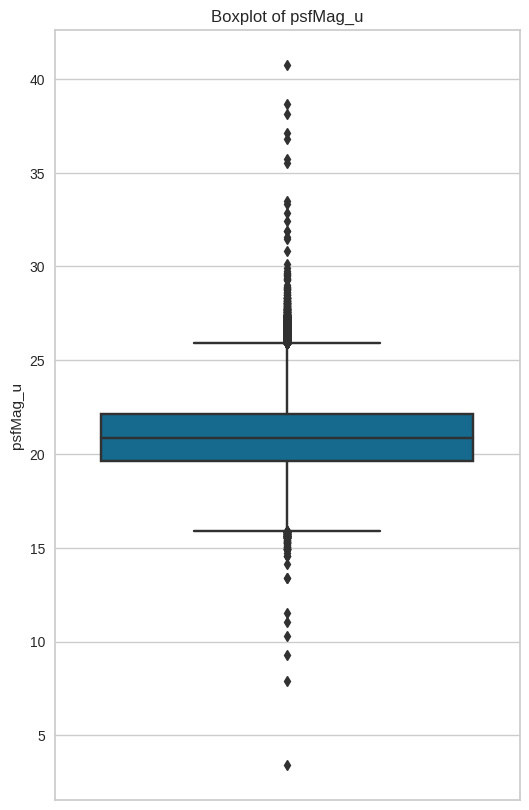

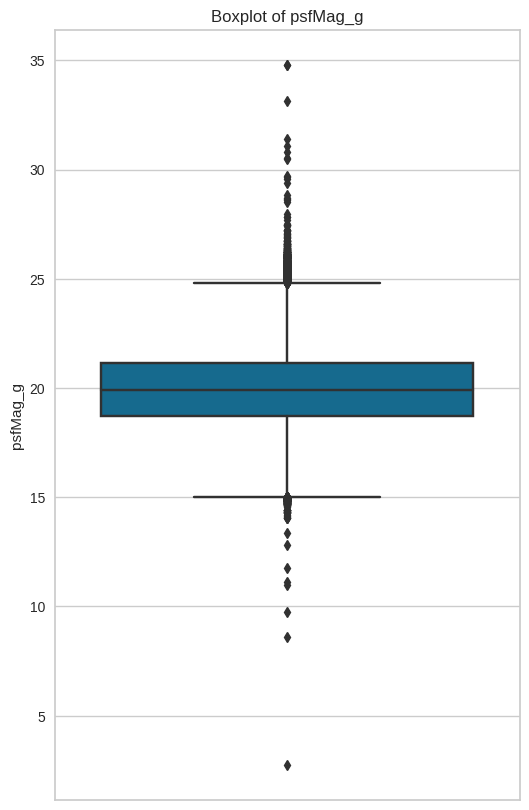

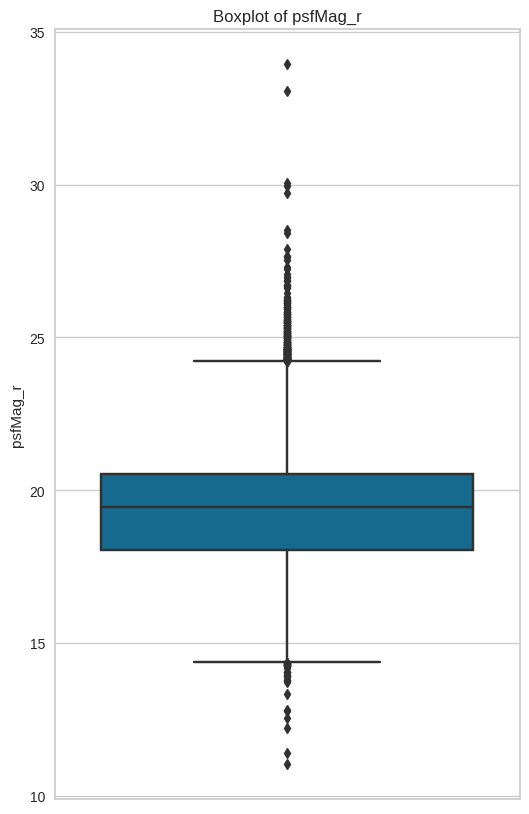

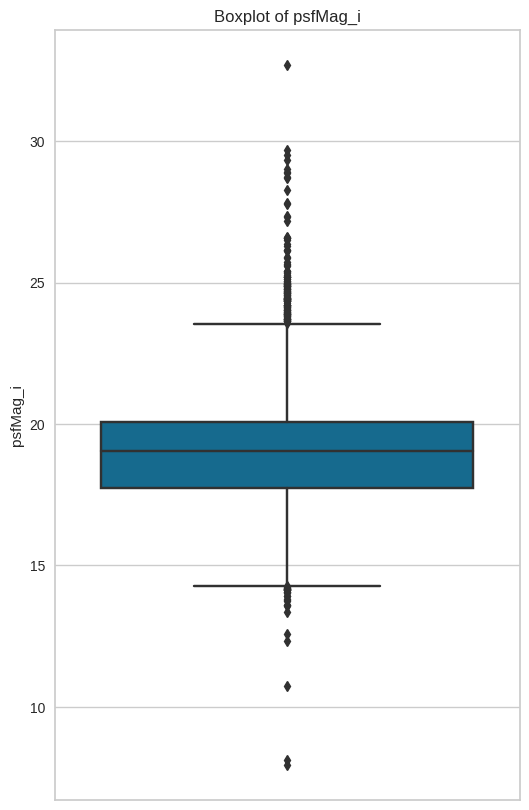

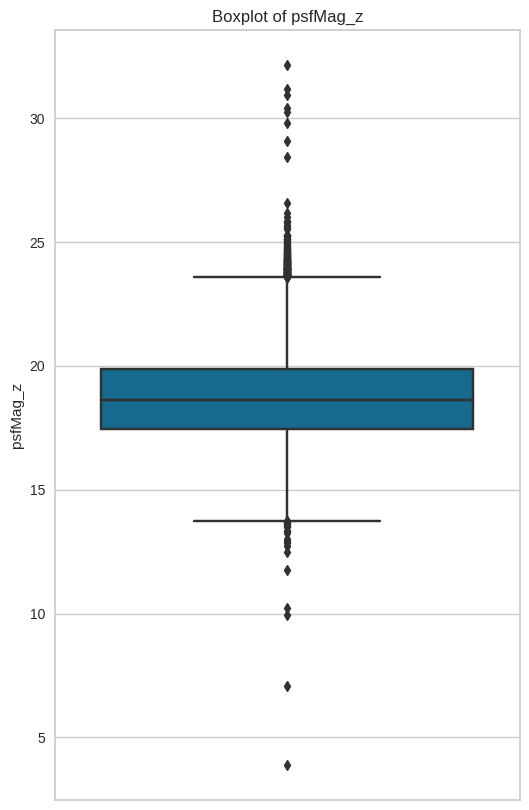

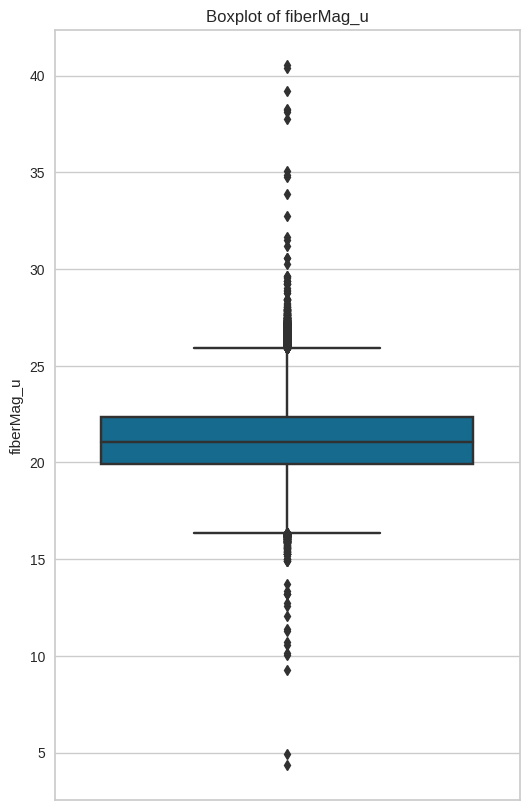

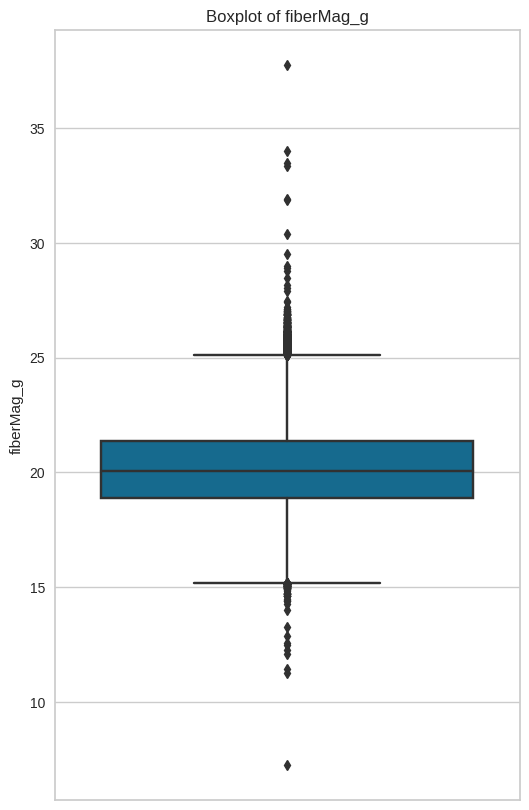

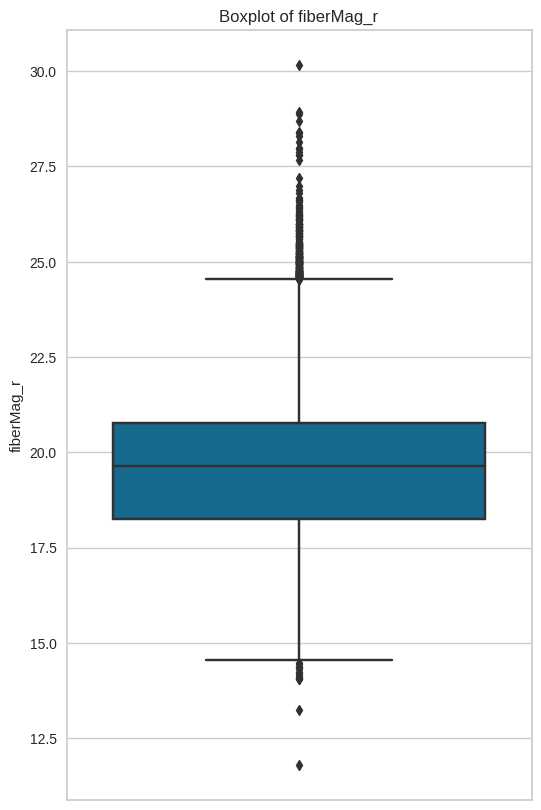

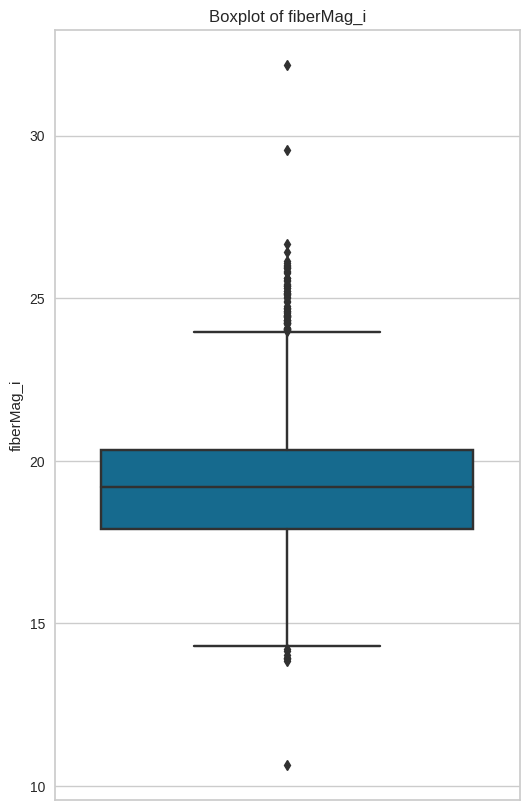

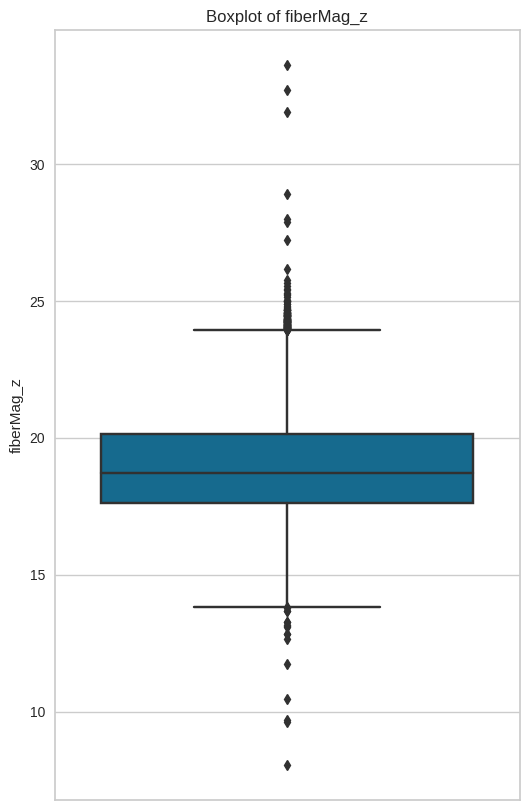

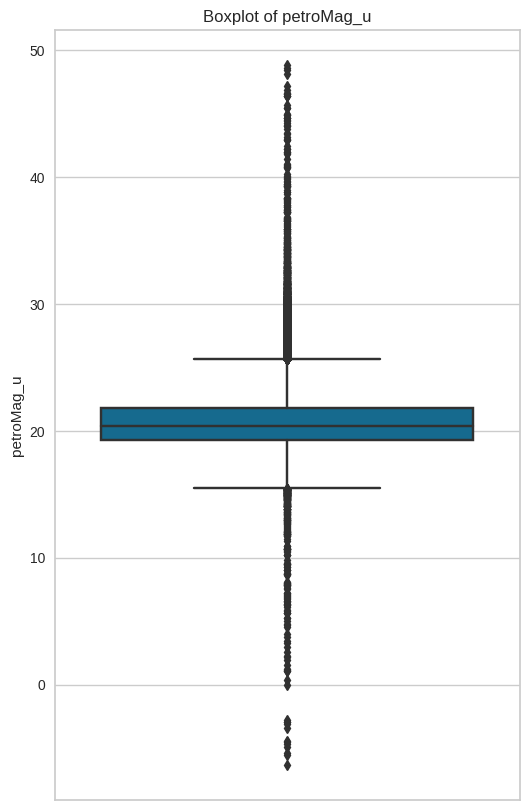

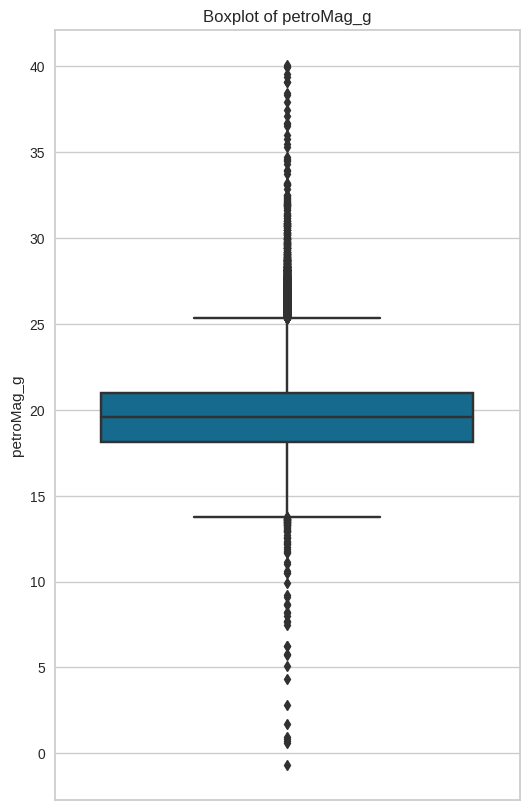

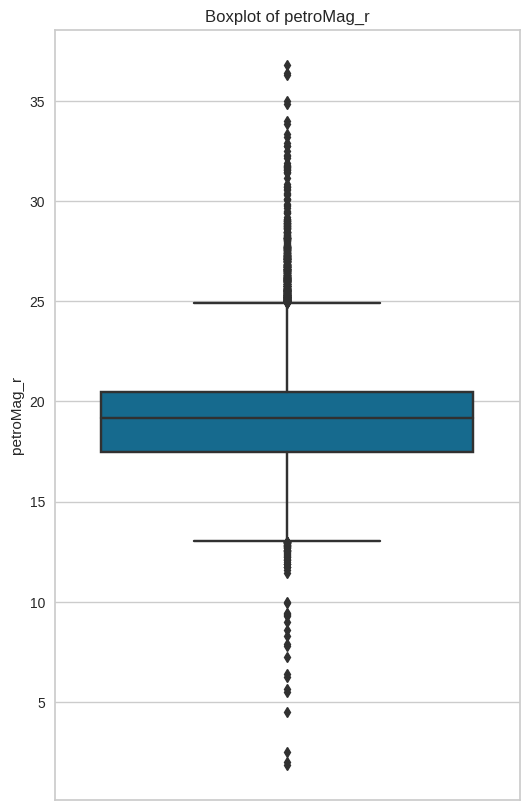

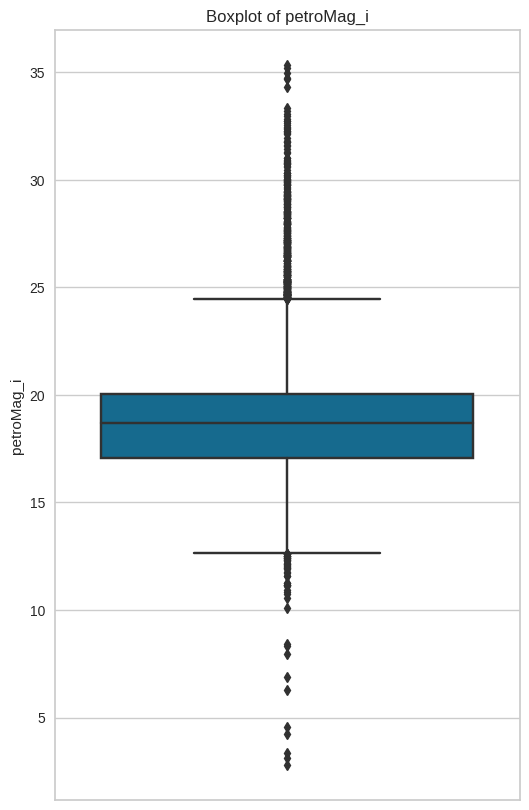

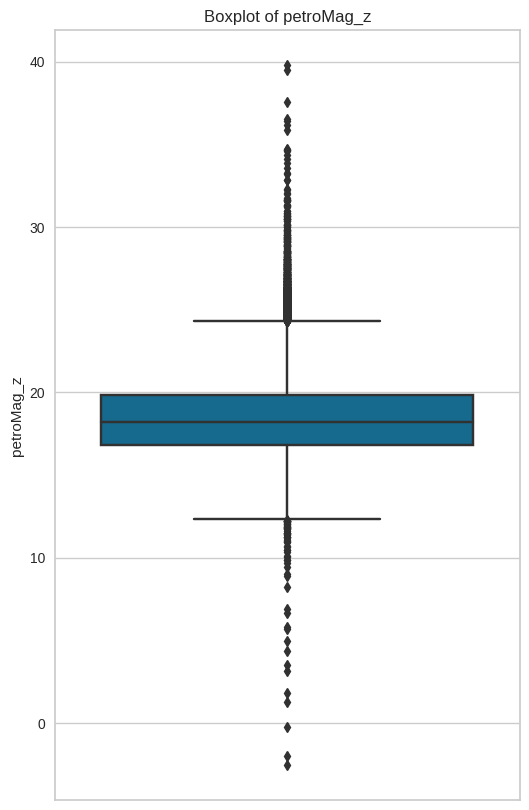

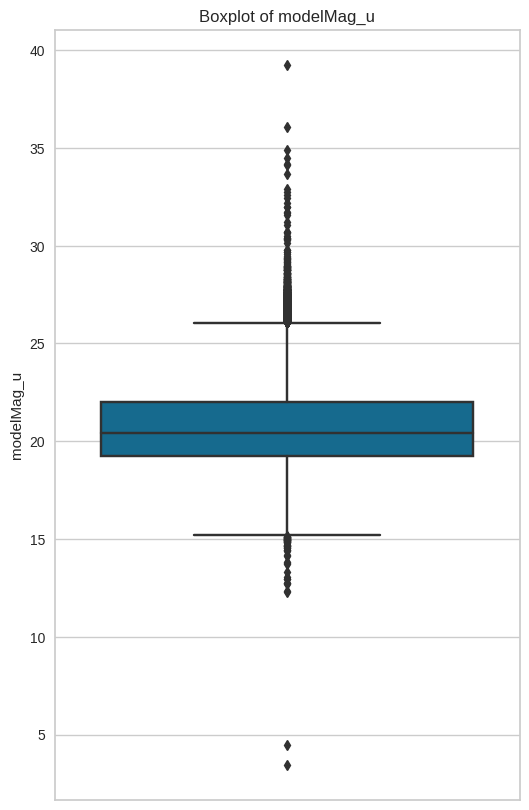

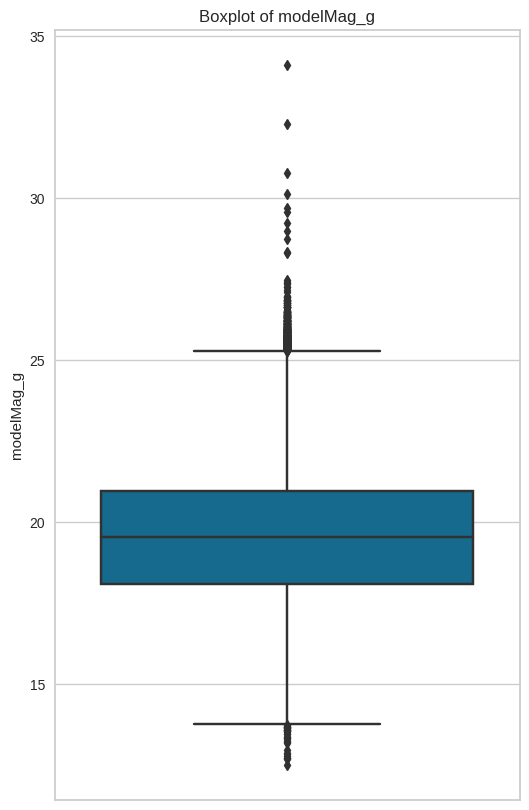

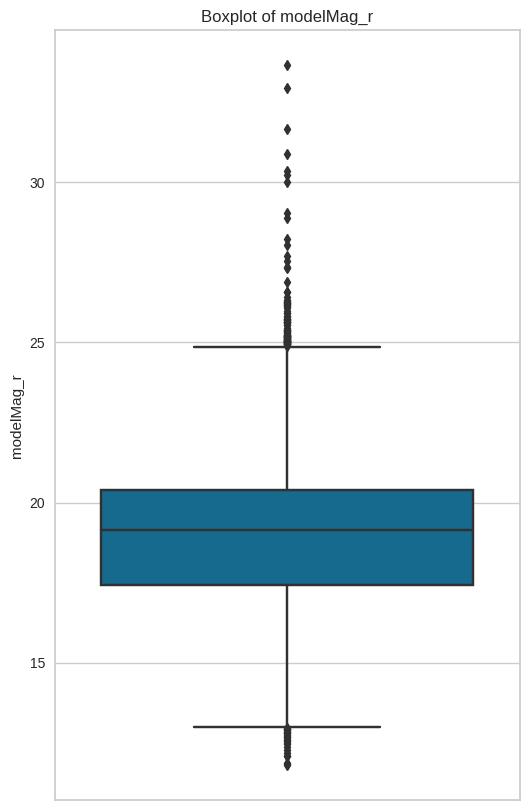

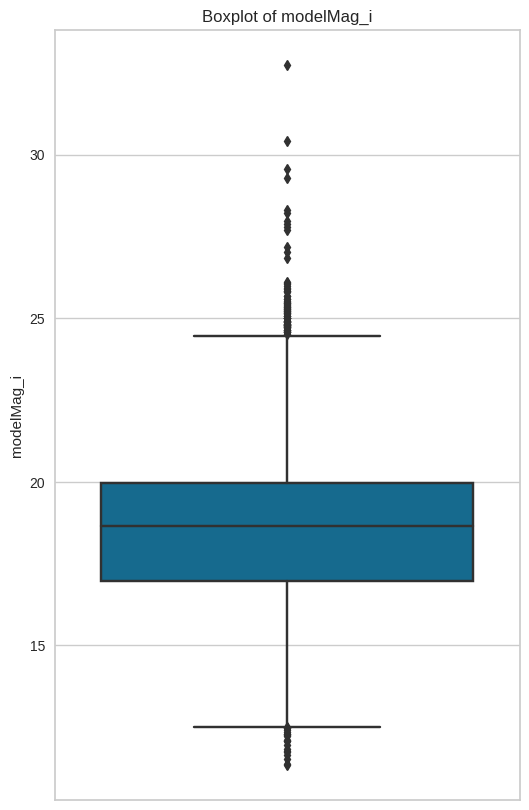

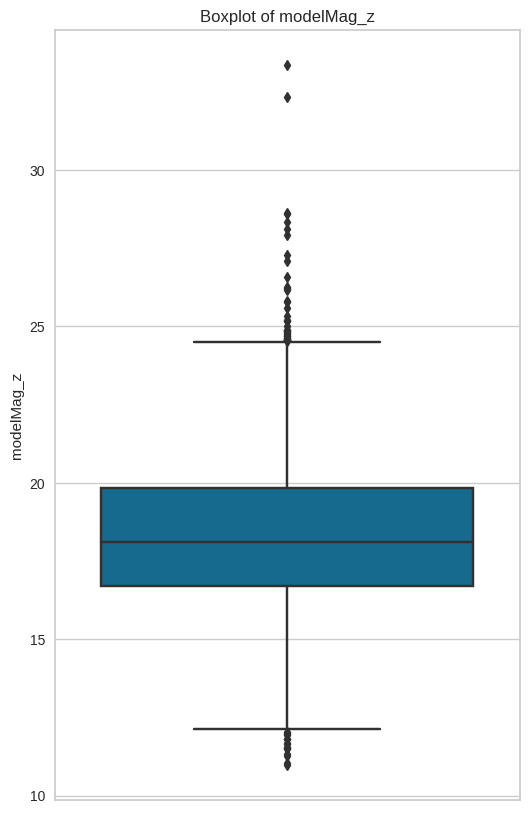

In [ ]:
#b에대한 이상치 제거 후 boxplot
for column in b:
    plt.figure(figsize=(6,10))
    sns.boxplot(y=eda[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

<Axes: >

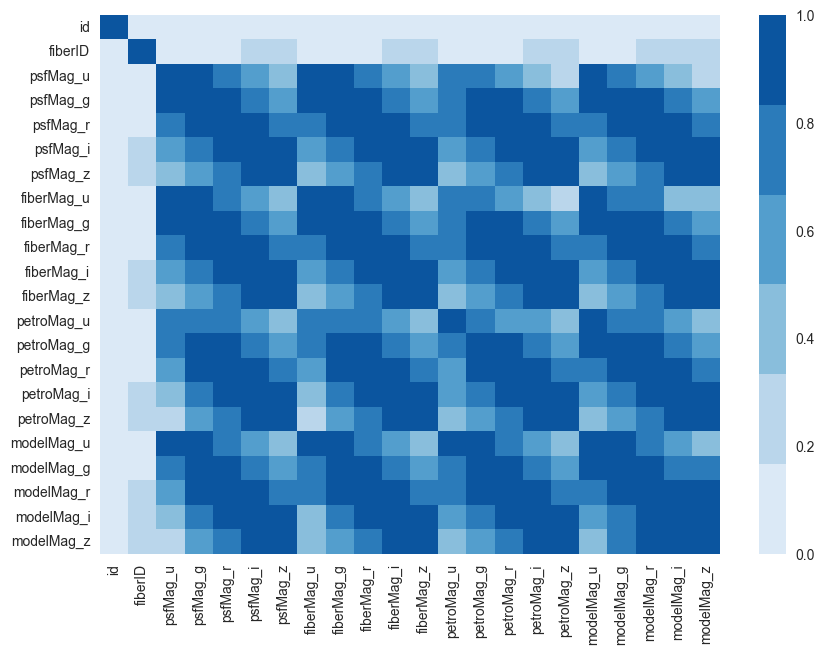

In [ ]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = eda.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [ ]:
# type에서 비율이 비슷한 SPECTROPHOTO_STD와 REDDEN_STD만 따져봄
df = df_train[(df_train['type']=='SPECTROPHOTO_STD') | (df_train['type']=='REDDEN_STD')]

In [ ]:
X = df.drop(columns=['type'])  # 타겟 컬럼을 제외한 모든 열을 특성으로 사용
y = df['type']  # 타겟 컬럼을 설정

# 데이터를 test와 train set로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델링 및 분석

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
exp1 = setup(data=pd.concat([X_train, y_train], axis=1), target = 'type', session_id = 42, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,42
1,Target,type
2,Target type,Binary
3,Target mapping,"REDDEN_STD: 0, SPECTROPHOTO_STD: 1"
4,Original data shape,"(23398, 23)"
5,Transformed data shape,"(23398, 23)"
6,Transformed train set shape,"(16378, 23)"
7,Transformed test set shape,"(7020, 23)"
8,Numeric features,22
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9816,0.9985,0.9816,0.9816,0.9816,0.9632,0.9633,0.9200
rf,Random Forest Classifier,0.9803,0.9981,0.9803,0.9803,0.9803,0.9606,0.9606,3.0120
gbc,Gradient Boosting Classifier,0.9802,0.9980,0.9802,0.9803,0.9802,0.9604,0.9605,12.7620
lightgbm,Light Gradient Boosting Machine,0.9800,0.9984,0.9800,0.9800,0.9800,0.9599,0.9600,0.3930
catboost,CatBoost Classifier,0.9798,0.9983,0.9798,0.9798,0.9798,0.9596,0.9596,34.6450
xgboost,Extreme Gradient Boosting,0.9792,0.9983,0.9792,0.9792,0.9792,0.9584,0.9584,0.4480
ada,Ada Boost Classifier,0.9782,0.9982,0.9782,0.9782,0.9782,0.9564,0.9564,3.0020
dt,Decision Tree Classifier,0.9701,0.9701,0.9701,0.9701,0.9701,0.9402,0.9402,0.7270
lda,Linear Discriminant Analysis,0.9655,0.9962,0.9655,0.9661,0.9655,0.9310,0.9316,0.2040
ridge,Ridge Classifier,0.9653,0.0000,0.9653,0.9658,0.9652,0.9305,0.9311,0.1920


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)

In [ ]:
# 개별 모델 생성 및 학습
rf_model = create_model('rf')
gbc_model = create_model('gbc')
cat_model = create_model('catboost')
lgb_model = create_model('lightgbm')
xgb_model = create_model('xgboost')

# 앙상블 모델 생성 및 학습
blended = blend_models(estimator_list = [rf_model, gbc_model, cat_model, lgb_model, xgb_model], method = 'soft') # 블렌딩 모델
stacked = stack_models(estimator_list = [rf_model, gbc_model, cat_model, lgb_model, xgb_model]) # 스태킹 모델

# 모델 성능 비교
rf_pred = predict_model(rf_model)
gbc_pred = predict_model(gbc_model)
cat_pred = predict_model(cat_model)
lgb_pred = predict_model(lgb_model)
xgb_pred = predict_model(xgb_model)
blended_pred = predict_model(blended)
stacked_pred = predict_model(stacked)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9847,0.9983,0.9847,0.9848,0.9847,0.9695,0.9695
1,0.9829,0.9967,0.9829,0.9829,0.9829,0.9658,0.9658
2,0.9811,0.9982,0.9811,0.9811,0.9811,0.9621,0.9622
3,0.9811,0.9988,0.9811,0.9811,0.9811,0.9621,0.9622
4,0.9750,0.9971,0.9750,0.9751,0.9750,0.9499,0.9500
5,0.9792,0.9980,0.9792,0.9793,0.9792,0.9585,0.9585
6,0.9768,0.9984,0.9768,0.9768,0.9768,0.9536,0.9536
7,0.9799,0.9986,0.9799,0.9799,0.9799,0.9597,0.9597
8,0.9817,0.9985,0.9817,0.9817,0.9817,0.9633,0.9634


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9823,0.9989,0.9823,0.9823,0.9823,0.9646,0.9646
1,0.9811,0.9968,0.9811,0.9811,0.9811,0.9621,0.9622
2,0.9823,0.9983,0.9823,0.9824,0.9823,0.9646,0.9646
3,0.9805,0.9975,0.9805,0.9805,0.9805,0.9609,0.9609
4,0.9774,0.9985,0.9774,0.9776,0.9774,0.9548,0.9550
5,0.9774,0.9967,0.9774,0.9774,0.9774,0.9548,0.9548
6,0.9774,0.9981,0.9774,0.9774,0.9774,0.9548,0.9548
7,0.9817,0.9986,0.9817,0.9817,0.9817,0.9634,0.9634
8,0.9798,0.9985,0.9798,0.9799,0.9798,0.9597,0.9597


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9835,0.9988,0.9835,0.9836,0.9835,0.9670,0.9671
1,0.9817,0.9984,0.9817,0.9817,0.9817,0.9634,0.9634
2,0.9780,0.9984,0.9780,0.9781,0.9780,0.9560,0.9561
3,0.9817,0.9986,0.9817,0.9817,0.9817,0.9634,0.9634
4,0.9780,0.9983,0.9780,0.9782,0.9780,0.9560,0.9562
5,0.9774,0.9975,0.9774,0.9774,0.9774,0.9548,0.9548
6,0.9756,0.9978,0.9756,0.9756,0.9756,0.9512,0.9512
7,0.9817,0.9986,0.9817,0.9817,0.9817,0.9634,0.9634
8,0.9805,0.9985,0.9805,0.9805,0.9805,0.9609,0.9609


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9805,0.9990,0.9805,0.9805,0.9805,0.9609,0.9610
1,0.9841,0.9979,0.9841,0.9841,0.9841,0.9683,0.9683
2,0.9811,0.9986,0.9811,0.9811,0.9811,0.9621,0.9622
3,0.9823,0.9987,0.9823,0.9823,0.9823,0.9646,0.9646
4,0.9750,0.9984,0.9750,0.9750,0.9750,0.9499,0.9500
5,0.9786,0.9978,0.9786,0.9787,0.9786,0.9573,0.9573
6,0.9762,0.9981,0.9762,0.9762,0.9762,0.9524,0.9524
7,0.9799,0.9984,0.9799,0.9799,0.9799,0.9597,0.9598
8,0.9811,0.9985,0.9811,0.9811,0.9811,0.9621,0.9622


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9817,0.9988,0.9817,0.9817,0.9817,0.9634,0.9634
1,0.9805,0.9979,0.9805,0.9805,0.9805,0.9609,0.9610
2,0.9799,0.9981,0.9799,0.9799,0.9799,0.9597,0.9597
3,0.9841,0.9986,0.9841,0.9841,0.9841,0.9683,0.9683
4,0.9719,0.9982,0.9719,0.9720,0.9719,0.9438,0.9439
5,0.9780,0.9975,0.9780,0.9780,0.9780,0.9560,0.9560
6,0.9756,0.9981,0.9756,0.9756,0.9756,0.9512,0.9512
7,0.9811,0.9984,0.9811,0.9811,0.9811,0.9621,0.9622
8,0.9774,0.9987,0.9774,0.9774,0.9774,0.9548,0.9548


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9817,0.9990,0.9817,0.9817,0.9817,0.9634,0.9634
1,0.9847,0.9983,0.9847,0.9848,0.9847,0.9695,0.9695
2,0.9799,0.9986,0.9799,0.9799,0.9799,0.9597,0.9598
3,0.9817,0.9989,0.9817,0.9817,0.9817,0.9634,0.9634
4,0.9756,0.9984,0.9756,0.9757,0.9756,0.9512,0.9512
5,0.9792,0.9979,0.9792,0.9793,0.9792,0.9585,0.9585
6,0.9750,0.9983,0.9750,0.9750,0.9750,0.9499,0.9500
7,0.9811,0.9987,0.9811,0.9811,0.9811,0.9621,0.9622
8,0.9817,0.9986,0.9817,0.9817,0.9817,0.9633,0.9634


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9817,0.9959,0.9817,0.9817,0.9817,0.9634,0.9634
1,0.9847,0.9941,0.9847,0.9848,0.9847,0.9695,0.9695
2,0.9786,0.9938,0.9786,0.9787,0.9786,0.9573,0.9573
3,0.9829,0.9988,0.9829,0.9829,0.9829,0.9658,0.9658
4,0.9762,0.9944,0.9762,0.9763,0.9762,0.9524,0.9525
5,0.9817,0.9929,0.9817,0.9817,0.9817,0.9634,0.9634
6,0.9768,0.9925,0.9768,0.9768,0.9768,0.9536,0.9536
7,0.9805,0.9978,0.9805,0.9805,0.9805,0.9609,0.9610
8,0.9805,0.9983,0.9805,0.9805,0.9805,0.9609,0.9609


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9789,0.9981,0.9789,0.9789,0.9789,0.9578,0.9578


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9799,0.9986,0.9799,0.9799,0.9799,0.9598,0.9598


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9785,0.9984,0.9785,0.9785,0.9785,0.9570,0.9570


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9778,0.9985,0.9778,0.9778,0.9778,0.9556,0.9556


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9774,0.9984,0.9774,0.9774,0.9774,0.9547,0.9547


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9786,0.9986,0.9786,0.9786,0.9786,0.9573,0.9573


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9775,0.9941,0.9775,0.9775,0.9775,0.9550,0.9550


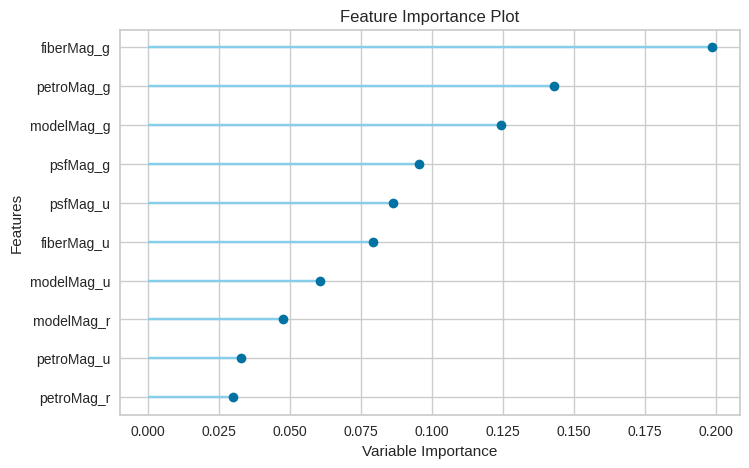

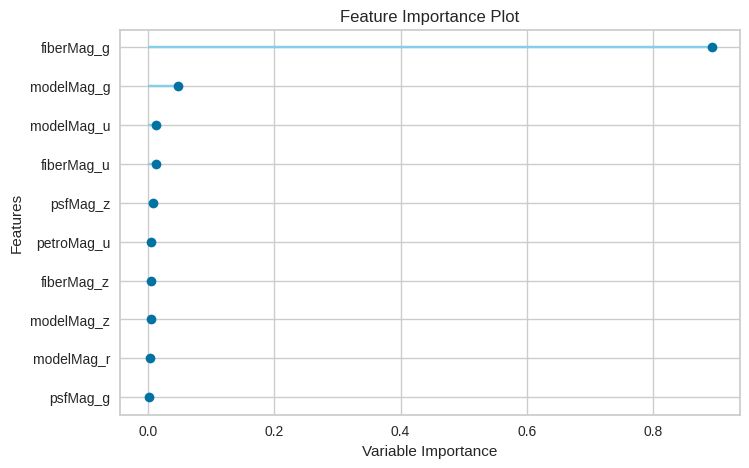

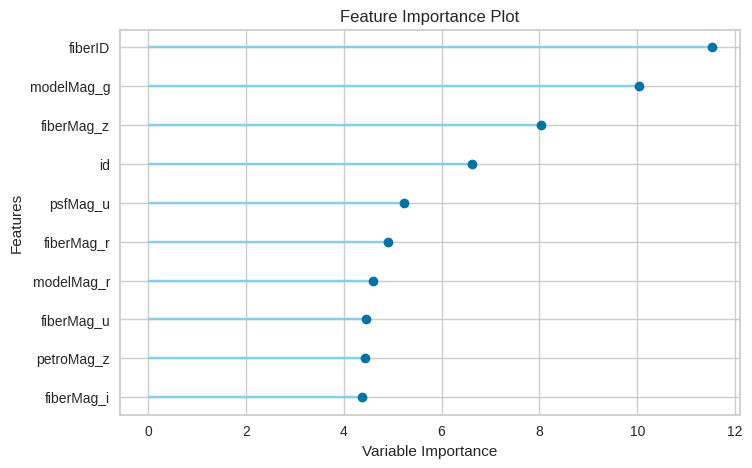

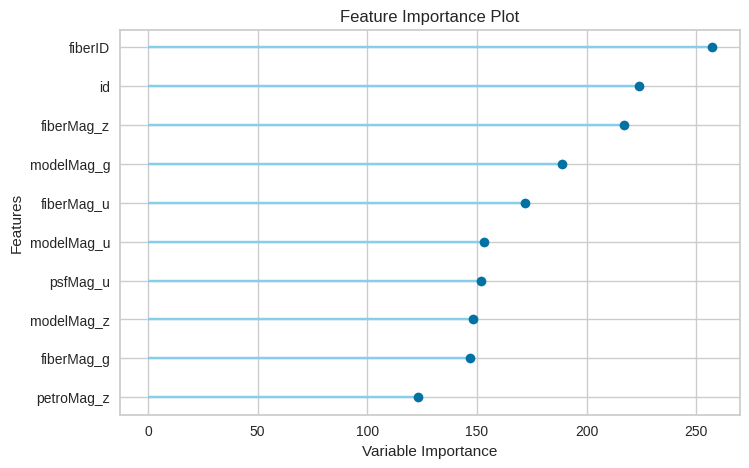

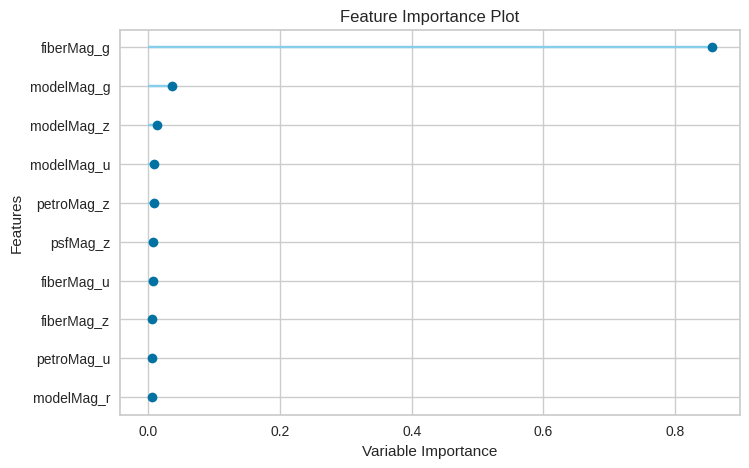

In [ ]:
# 변수 중요도 확인
plot_model(rf_model, plot = 'feature')
plot_model(gbc_model, plot = 'feature')
plot_model(cat_model, plot = 'feature')
plot_model(lgb_model, plot = 'feature')
plot_model(xgb_model, plot = 'feature')

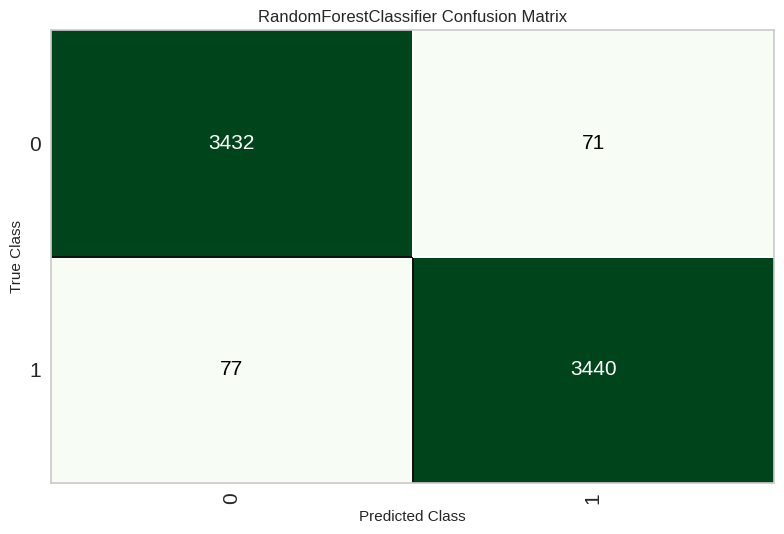

In [ ]:
plot_model(rf_model, plot = 'confusion_matrix')

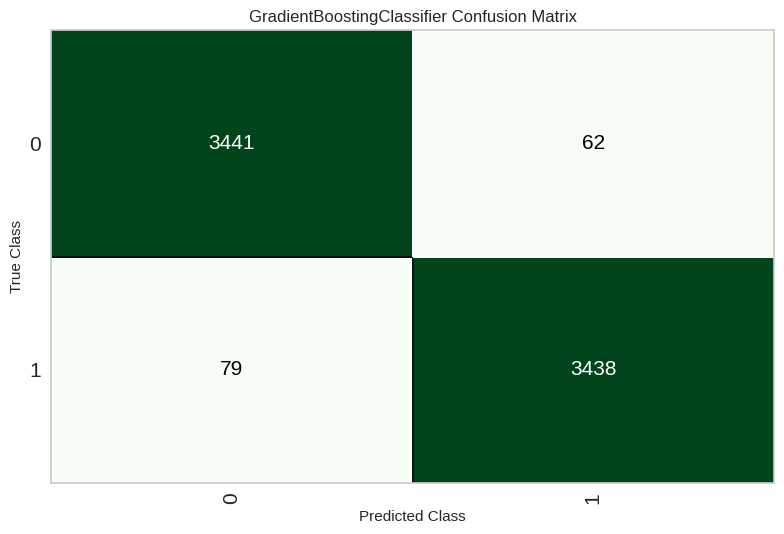

In [ ]:
plot_model(gbc_model, plot = 'confusion_matrix')

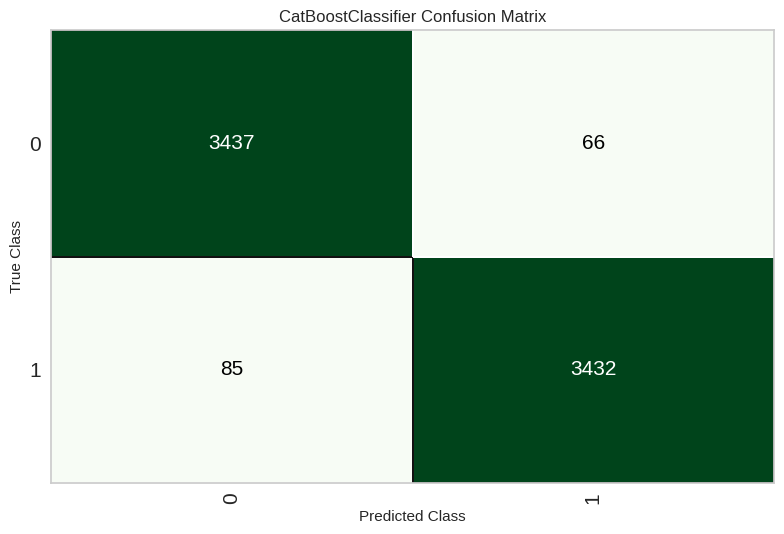

In [ ]:
plot_model(cat_model, plot = 'confusion_matrix')

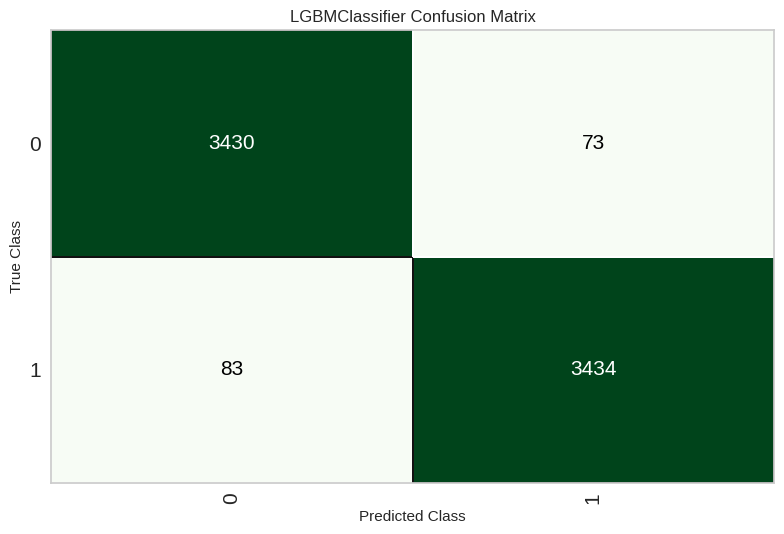

In [ ]:
plot_model(lgb_model, plot = 'confusion_matrix')

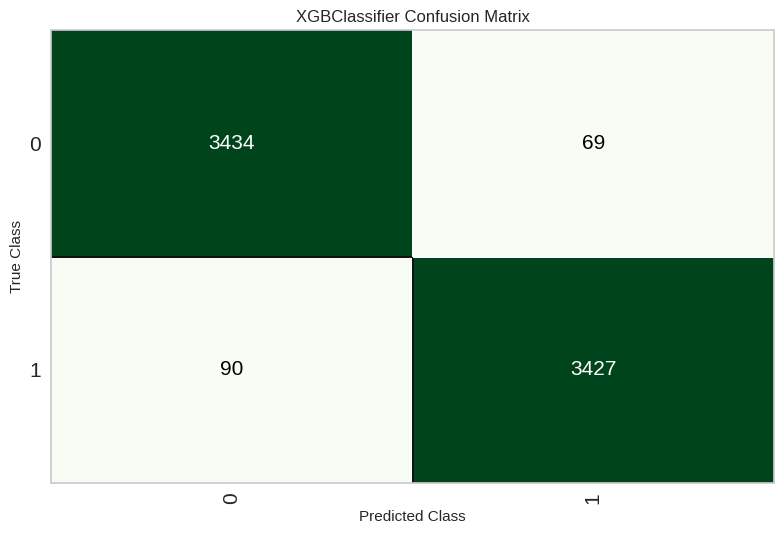

In [ ]:
plot_model(xgb_model, plot = 'confusion_matrix')

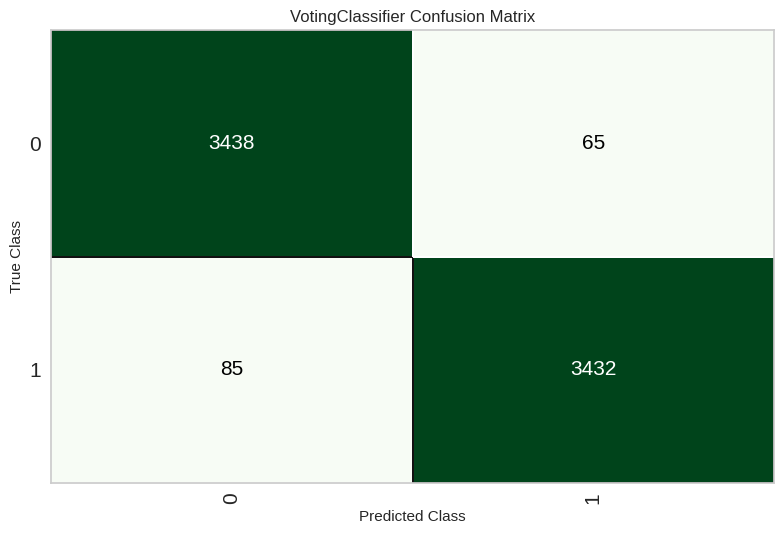

In [ ]:
plot_model(blended, plot = 'confusion_matrix')

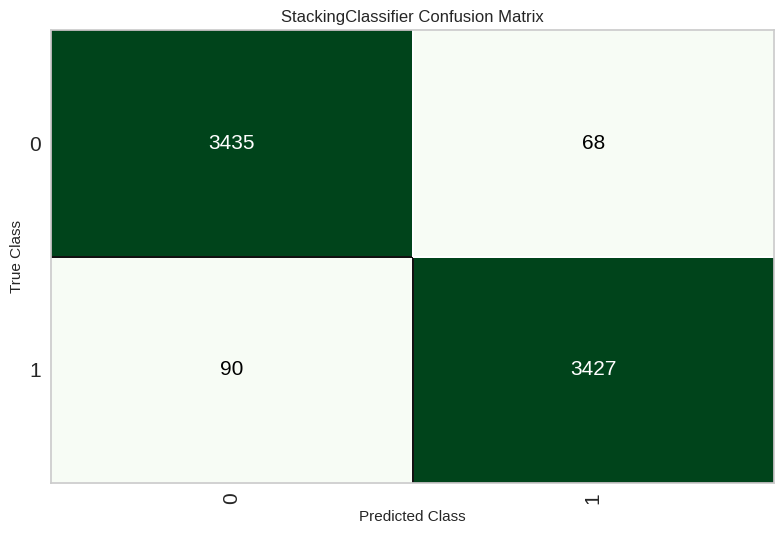

In [ ]:
plot_model(stacked, plot = 'confusion_matrix')

# 모델 평가

In [ ]:
# Finalize model
rf_final = finalize_model(rf_model)

# Predict - 최종모델로 예측 진행!
predict_rf = predict_model(rf_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9802,0.9986,0.9802,0.9802,0.9802,0.9603,0.9604


In [ ]:
# Finalize model
gbc_final = finalize_model(gbc_model)

# Predict - 최종모델로 예측 진행!
predict_gbc = predict_model(gbc_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9791,0.9980,0.9791,0.9792,0.9791,0.9583,0.9583


In [ ]:
# Finalize model
cat_final = finalize_model(cat_model)

# Predict - 최종모델로 예측 진행!
predict_cat = predict_model(cat_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9803,0.9988,0.9803,0.9804,0.9803,0.9607,0.9607


In [ ]:
# Finalize model
lgb_final = finalize_model(lgb_model)

# Predict - 최종모델로 예측 진행!
predict_lgb = predict_model(lgb_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9815,0.9987,0.9815,0.9816,0.9815,0.9631,0.9631


In [ ]:
# Finalize model
xgb_final = finalize_model(xgb_model)

# Predict - 최종모델로 예측 진행!
predict_xgb = predict_model(xgb_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9807,0.9987,0.9807,0.9807,0.9807,0.9614,0.9614


In [ ]:
# # Finalize model
bd_final = finalize_model(blended)

# # Predict - 최종모델로 예측 진행!
predict_bd = predict_model(bd_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9810,0.9988,0.9810,0.9811,0.9810,0.9620,0.9621


In [ ]:
# # Finalize model
st_final = finalize_model(stacked)

# # Predict - 최종모델로 예측 진행!
predict_st = predict_model(st_final, data=pd.concat([X_test, y_test], axis=1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9812,0.9968,0.9812,0.9813,0.9812,0.9624,0.9625
